<a href="https://colab.research.google.com/github/EOkami/ML_project/blob/main/Projet_ML_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading the dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, make_scorer, mean_squared_error, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Install missing package
!pip install category_encoders

from category_encoders import LeaveOneOutEncoder, TargetEncoder

# --- 2. Load dataset ---
df = pd.read_csv("data/spotify-2023.csv", encoding="latin1")


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.5 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.5 MB 1.8 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.5 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.5 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.5 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 2.9/9.5 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 3.4/9.5 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 3.7/9.5 MB 1.8 MB/s eta 0:00:04
   ---------------- ----------------------- 3.9/9.5 MB 1.8 MB/s eta 0:00:04
   ------------------ --

##**Data visualisation**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df['streams'] = (
    df['streams']
    .replace({',': ''}, regex=True)
    .apply(pd.to_numeric, errors='coerce')
    .astype('Int64')
)

This code snippet handles the 'streams' column, which was initially of object type due to commas.
It removes the commas and converts the column to a numeric type (numeric type or categorial type ?), coercing any values that cannot be converted into NaN (Not a Number). Finally, it converts the column to Pandas' nullable integer dtype (Int64), which allows for missing values.
This is done before visualization so that 'streams' can be included in plots.

In [ ]:
df.head(15)

track_name              artist(s)_name  \
0   Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                  LALA                 Myke Towers   
2                               vampire              Olivia Rodrigo   
3                          Cruel Summer                Taylor Swift   
4                        WHERE SHE GOES                   Bad Bunny   
5                              Sprinter           Dave, Central Cee   
6                       Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                              Columbia                     Quevedo   
8                              fukumean                       Gunna   
9                       La Bebe - Remix       Peso Pluma, Yng Lvcas   
10                            un x100to   Bad Bunny, Grupo Frontera   
11                            Super Shy                    NewJeans   
12                              Flowers                 Miley Cyrus   
13                             Daylight               David Kushner   
14                            As It Was                Harry Styles   

    artist_count  released_year  released_month  released_day  \
0              2           2023               7            14   
1              1           2023               3            23   
2              1           2023               6            30   
3              1           2019               8            23   
4              1           2023               5            18   
5              2           2023               6             1   
6              2           2023               3            16   
7              1           2023               7             7   
8              1           2023               5            15   
9              2           2023               3            17   
10             2           2023               4            17   
11             1           2023               7             7   
12             1           2023               1            12   
13             1           2023               4            14   
14             1           2022               3            31   

    in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
0                    553                147   141381703                  43   
1                   1474                 48   133716286                  48   
2                   1397                113   140003974                  94   
3                   7858                100   800840817                 116   
4                   3133                 50   303236322                  84   
5                   2186                 91   183706234                  67   
6                   3090                 50   725980112                  34   
7                    714                 43    58149378                  25   
8                   1096                 83    95217315                  60   
9                   2953                 44   553634067                  49   
10                  2876                 40   505671438                  41   
11                   422                 55    58255150                  37   
12                 12211                115  1316855716                 300   
13                  3528                 98   387570742                  80   
14                 23575                130  2513188493                 403   

    ...  bpm  key   mode danceability_%  valence_% energy_% acousticness_%  \
0   ...  125    B  Major             80         89       83             31   
1   ...   92   C#  Major             71         61       74              7   
2   ...  138    F  Major             51         32       53             17   
3   ...  170    A  Major             55         58       72             11   
4   ...  144    A  Minor             65         23       80             14   
5   ...  141   C#  Major             92         66       58             19   
6   ...  148    F  Minor             67 

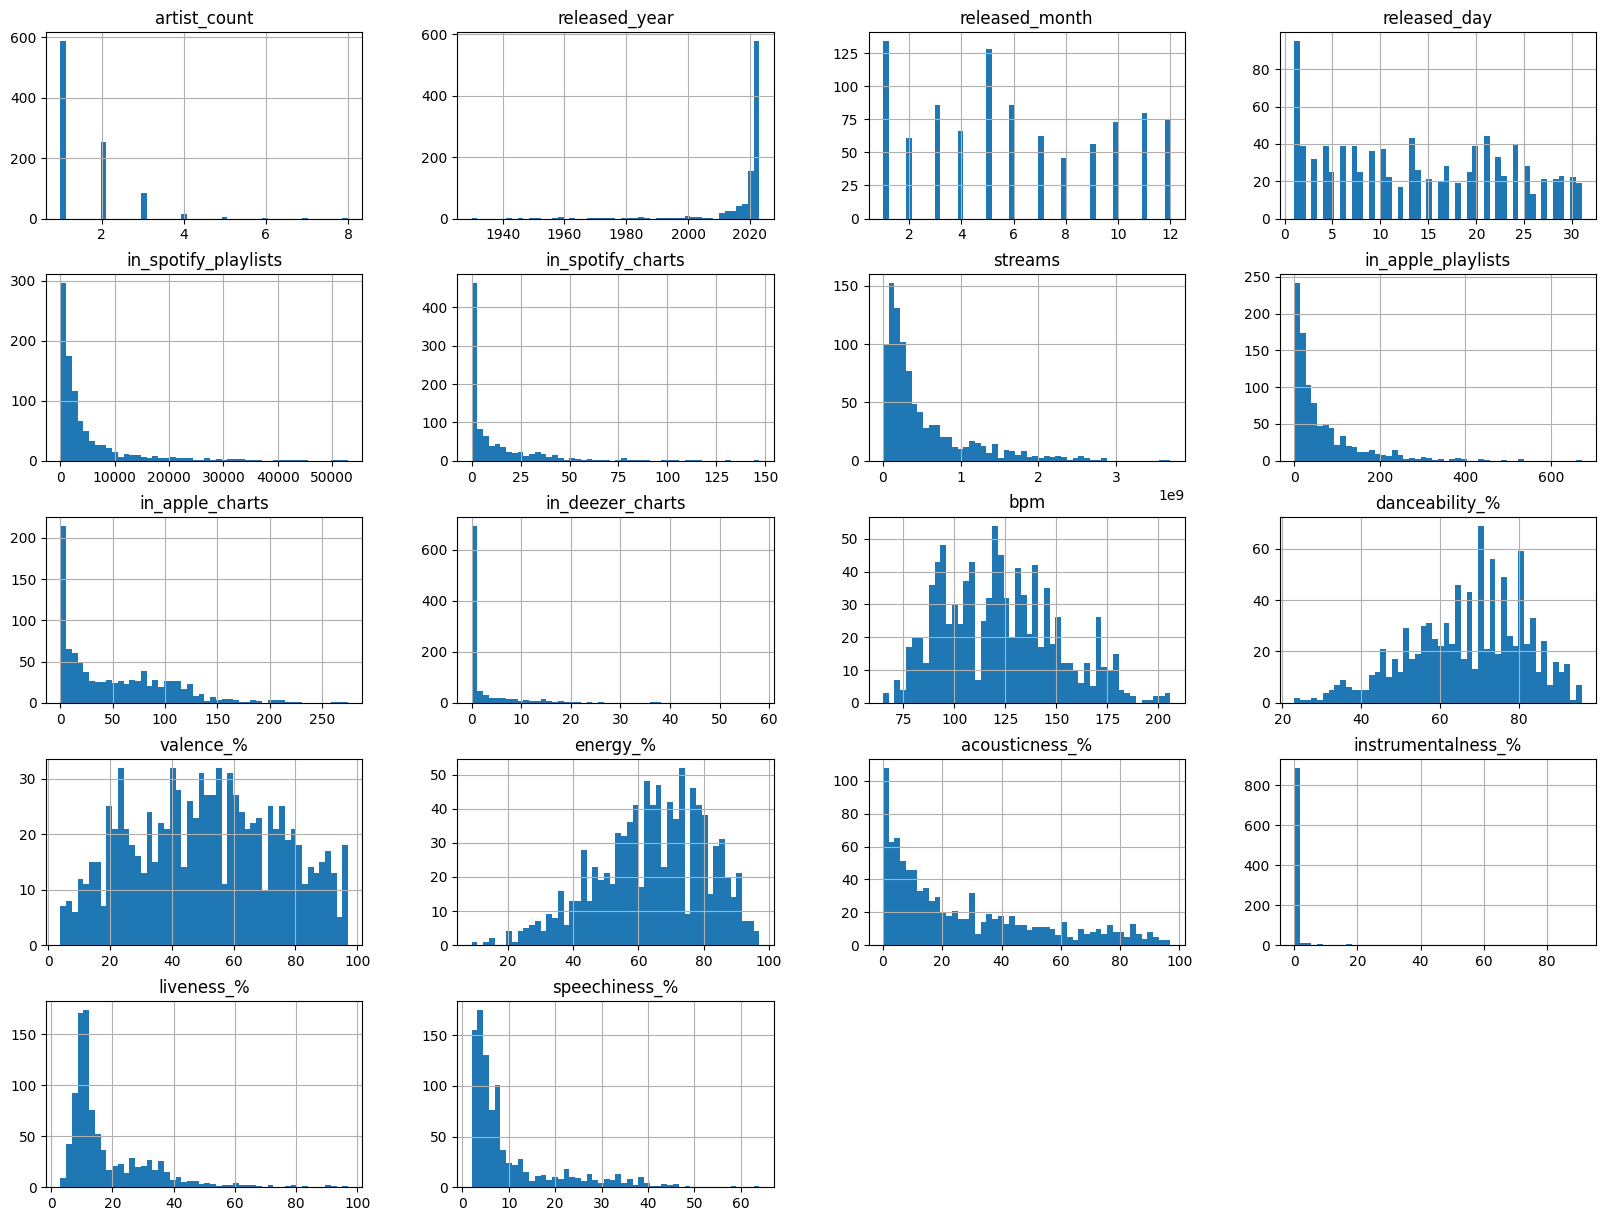

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

The histograms provide insights into the distribution of each numerical feature. Most features show varied distributions, with some appearing somewhat normally distributed (e.g., bpm), while others are skewed (e.g., streams, instrumentalness_%, speechiness_%). The highly skewed distribution of streams confirms the presence of a few songs with significantly higher stream counts, which can impact regression models. The distributions of released_year, released_month, and released_day show the temporal distribution of the data.

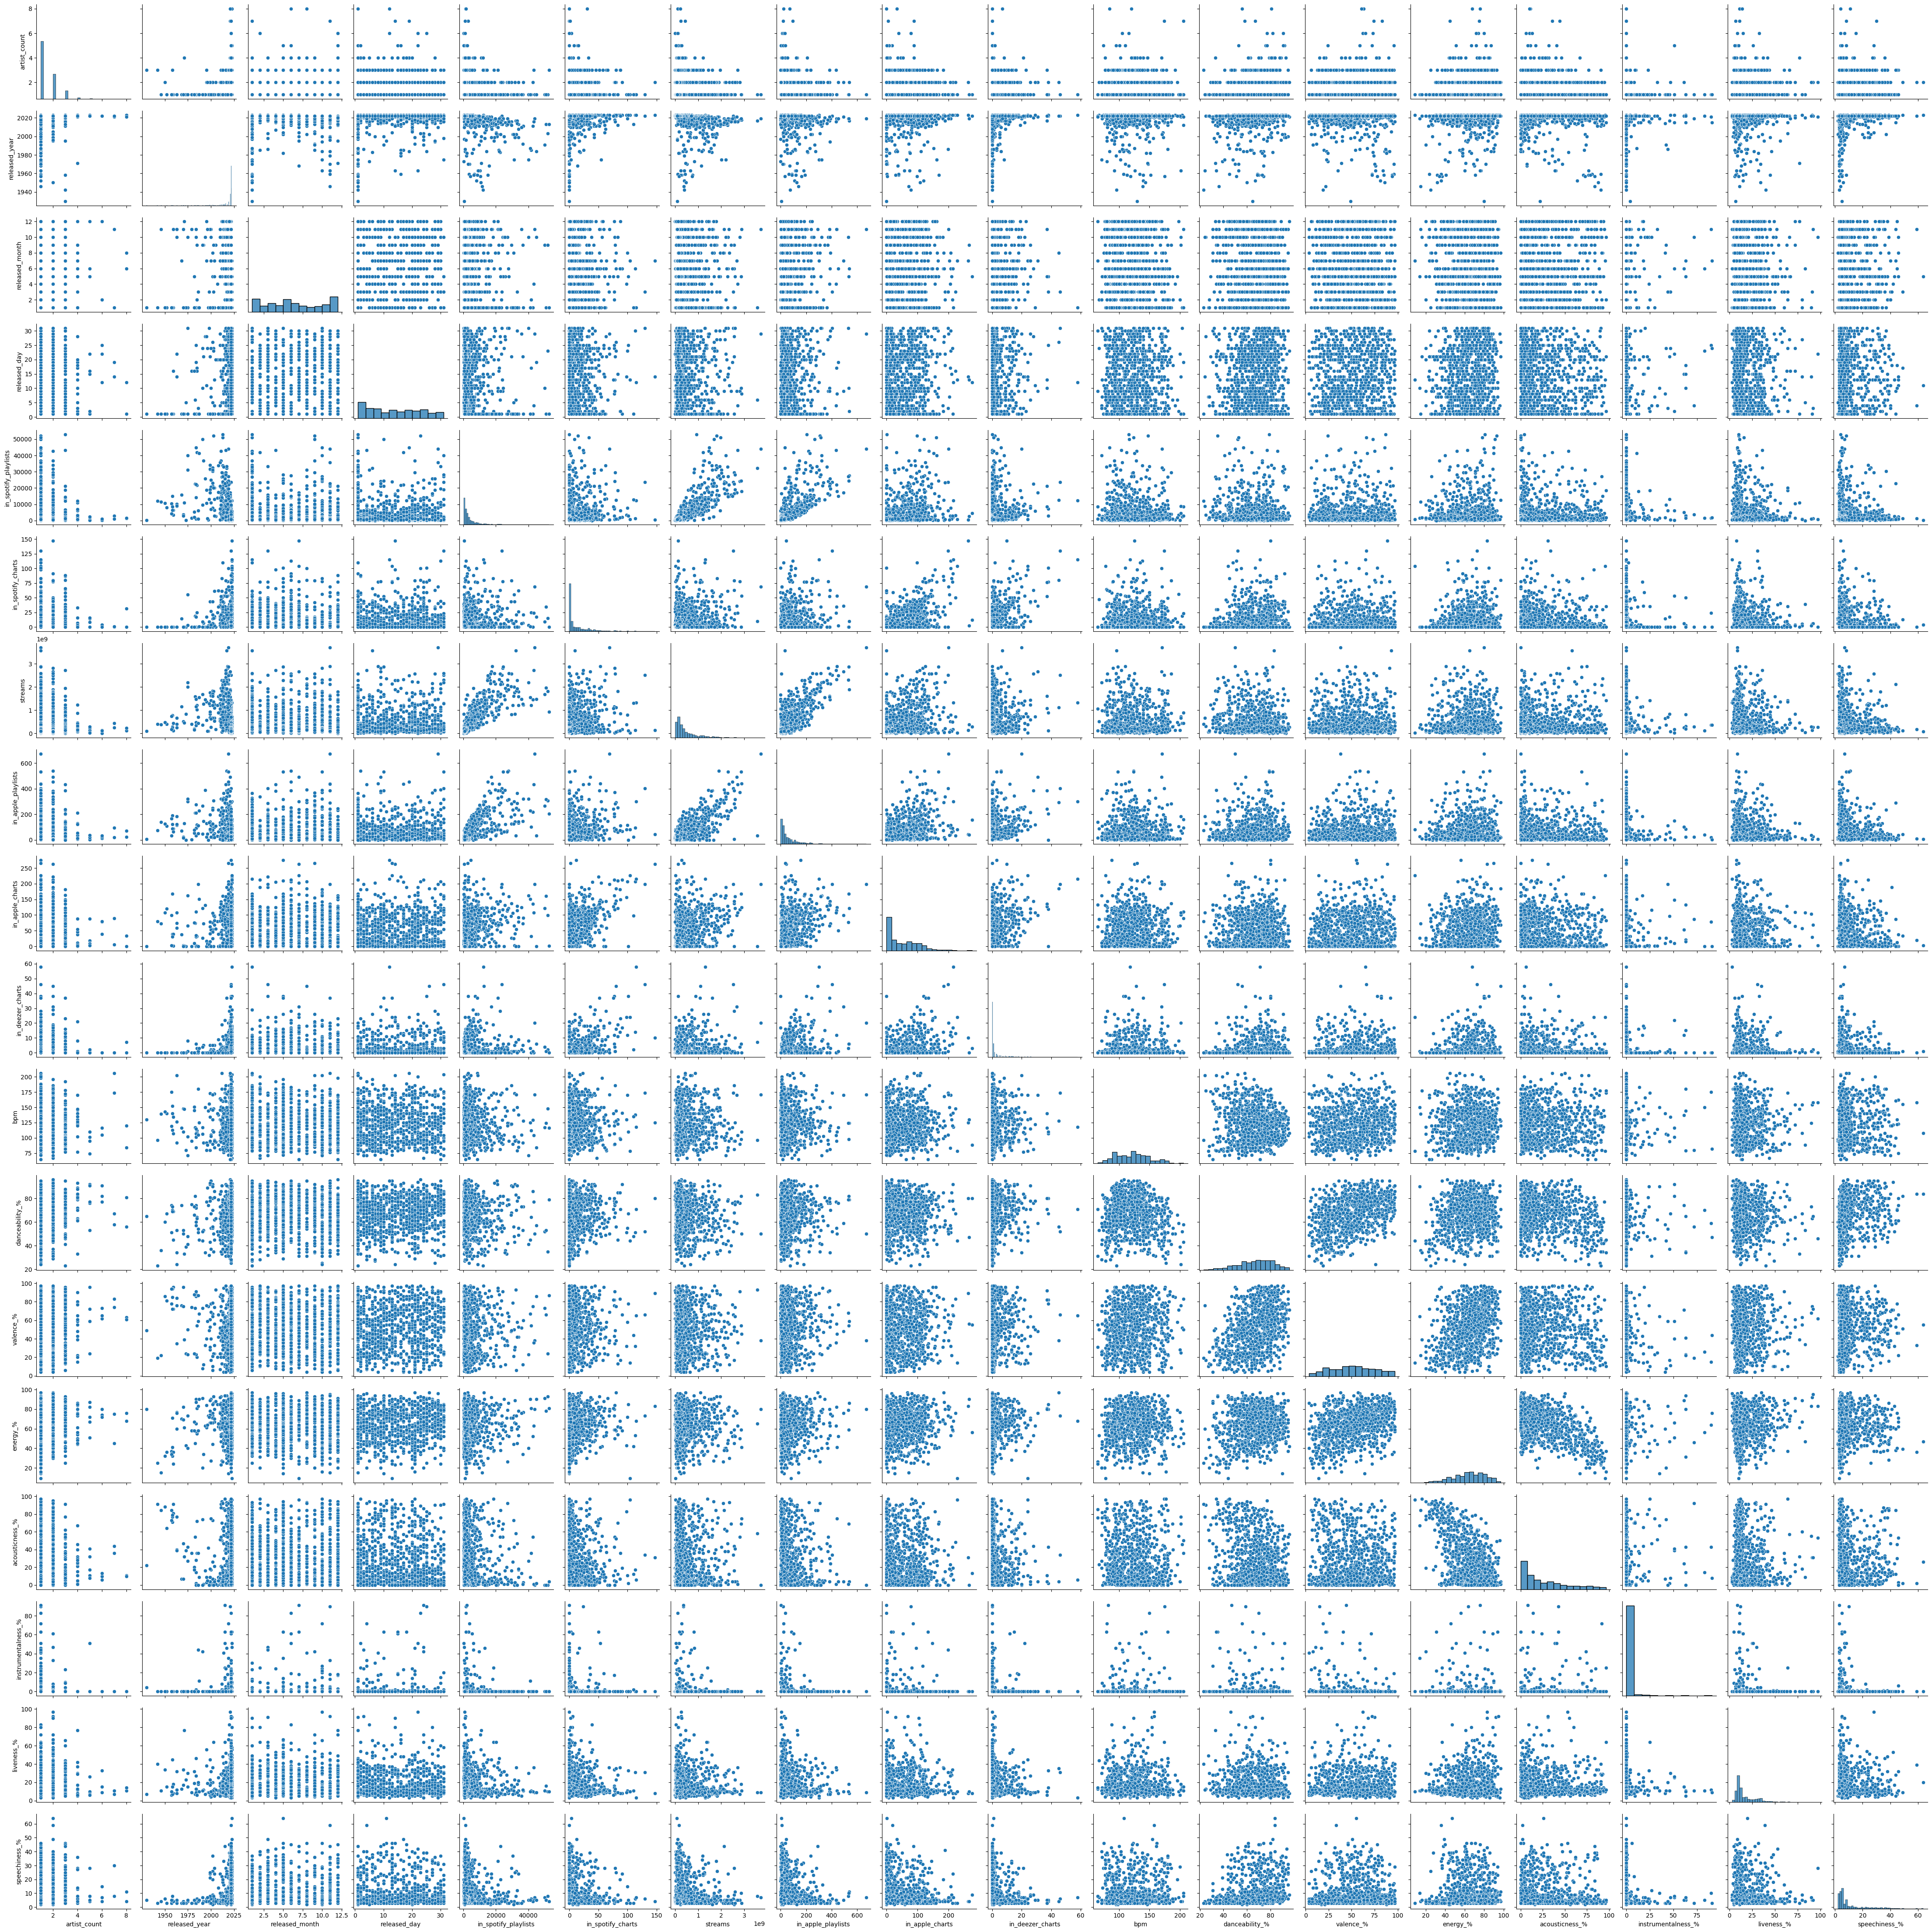

In [ ]:
sns.pairplot(df)
plt.show()

Looking at the pairplot for this dataset, we can notice several things:

No strong linear patterns:
Just like in the correlation matrix, the scatter plots between streams and the other numerical features don’t show clear straight-line relationships.
This suggests that a simple linear model might not capture the relationships in the data very well.

Shape of the distributions:
The histograms on the diagonal show how each feature is distributed.
We can see if some variables (like streams) are heavily skewed, meaning they might need to be transformed before training a model.
If some features have multiple peaks, that could also mean there are different clusters or groups of songs in the dataset.

Relationships between features:
Even though these aren’t directly tied to predicting streams, looking at how features relate to each other can be helpful.
For example, we might notice a link between energy and valence, or patterns showing that songs with certain BPM values tend to have higher danceability.
This helps us better understand the structure of the dataset and spot features that might be strongly correlated.

Overall, the pairplot confirms that the relationships between song features and streams are complex and probably non-linear.
It also reminds us to pay attention to how features are distributed and how they interact with each other before building models.

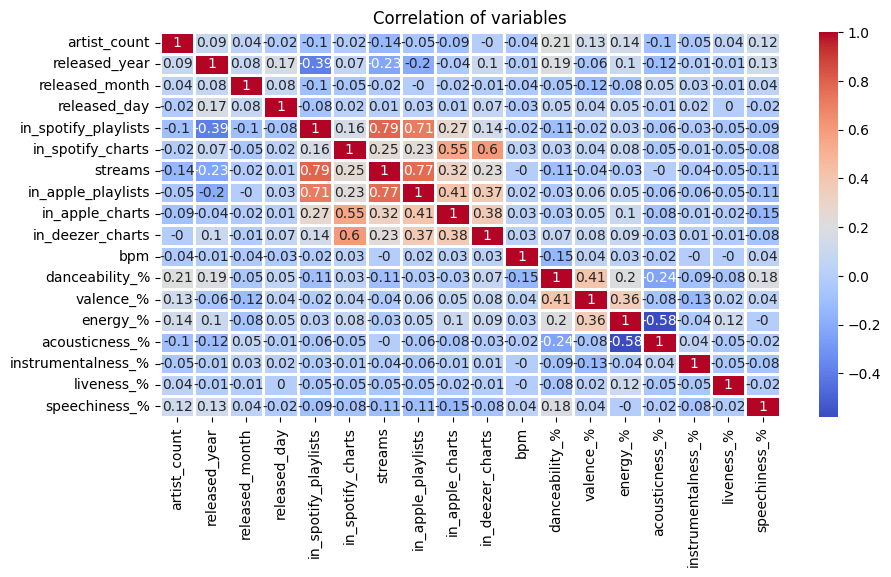

In [ ]:
num_df = df.select_dtypes(include=['float64', 'int64'])
corr= num_df.corr()

plt.figure(figsize=(10,5))
plt.title("Correlation of variables")
sns.heatmap(corr.round(2), cmap = 'coolwarm', annot = True, linewidth=0.9)
plt.show()

The correlation matrix shows that streams has a low linear correlation with most numerical features. released_year shows a slight negative correlation, indicating that older songs in this dataset tend to have more streams. The audio features (danceability_%, valence_%, energy_%, etc.) have very low correlations with streams, suggesting that a simple linear relationship between these features and streams is weak. There are some moderate correlations among the audio features themselves (e.g., energy_% and acousticness_% are negatively correlated).  
We observed that `in_charts` and `in_playlist` features were highly correlated with streams, which is expected as popular songs naturally appear in more playlists. However, since our goal is to predict a song's success before its release, we removed these metrics as they represent post-release outcomes rather than predictive features.

### Additionnal plot

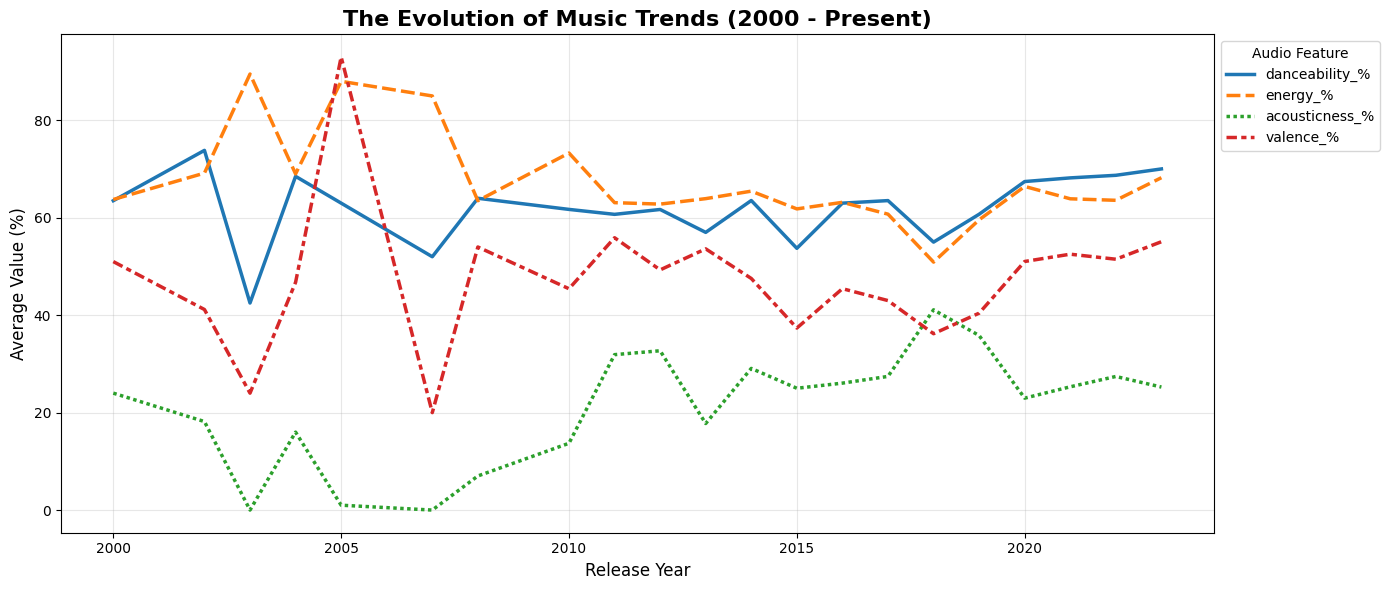

In [ ]:
audio_features = ['danceability_%', 'energy_%', 'acousticness_%', 'valence_%']
trends = df.groupby('released_year')[audio_features].mean()


trends_recent = trends.loc[2000:]

plt.figure(figsize=(14, 6))

sns.lineplot(data=trends_recent, linewidth=2.5)

plt.title("The Evolution of Music Trends (2000 - Present)", fontsize=16, fontweight='bold')
plt.ylabel("Average Value (%)", fontsize=12)
plt.xlabel("Release Year", fontsize=12)
plt.legend(title='Audio Feature', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This graph tracks the average values of key audio features over the last two decades to visualize how musical tastes have evolved. It justifies our use of temporal features by showing clear market trends, such as the consistent dominance of high energy and danceability compared to lower acousticness. This proves that a song's release year provides essential context for the model, as the definition of a popular sound changes over time.

In [ ]:
import plotly.graph_objects as go

df_for_radar = df.dropna(subset=['streams']).copy()
features_audio = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_radar = df_for_radar.copy()
df_radar['success_class'] = pd.qcut(df_radar['streams'], q=3, labels=["Flop", "Moyen", "Hit"])

radar_data = df_radar.groupby('success_class')[features_audio].mean().reset_index()

categories = features_audio
fig = go.Figure()

for i, row in radar_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].values.flatten().tolist(),
        theta=categories,
        fill='toself',
        name=row['success_class']
    ))

fig.update_layout(
  polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
  showlegend=True,
  title="Audio profile : Hit or Flop ?"
)
fig.show()

/tmp/ipython-input-2297766675.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radar_data = df_radar.groupby('success_class')[features_audio].mean().reset_index()


This radar chart compares the average audio profiles of Flops, Medium hits, and massive Hits across various features like energy and danceability. The striking overlap between the three shapes reveals that a hit song doesn't mathematically look different from a flop in terms of raw audio metrics. This lack of distinct separation explains why predicting success is so difficult using only audio data, as there is no clear "secret formula" that differentiates a chart-topper from an average track.

## **Preprocessing**

### Cleaning and column name

In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

We notice there are 2 categories with missing values :
- for the streams, since there is only one, we can delete the row with the missing value
- for the key, 95 values are missing. Since it's hard to replace accurately, and it is around 10 % of out dataset, we decided to delete these values also.
- for in_shazam_charts we are going to suppress this column so it has no importance

In [ ]:
df=df.drop(columns=['track_name','in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])


In [ ]:
df = df.dropna()

In [ ]:
current_year = df['released_year'].max()
df['song_age'] = current_year - df['released_year']
df['released_month_sin'] = np.sin(2 * np.pi * df['released_month'] / 12)
df['released_month_cos'] = np.cos(2 * np.pi * df['released_month'] / 12)
df['released_day_sin'] = np.sin(2 * np.pi * df['released_day'] / 31)
df['released_day_cos'] = np.cos(2 * np.pi * df['released_day'] / 31)
df = df.drop(columns=['released_year', 'released_month', 'released_day'])

This code calculates the age of each song and transforms the release dates into circular coordinates using sine and cosine functions. This is helpful because it allows the model to understand that December and January are temporally close, whereas standard numbers would incorrectly treat them as being very far apart.

### Definition of the target

In [ ]:
X = df.drop('streams', axis=1)
y = df['streams']
y_log = np.log1p(y)

### Log(y+1)

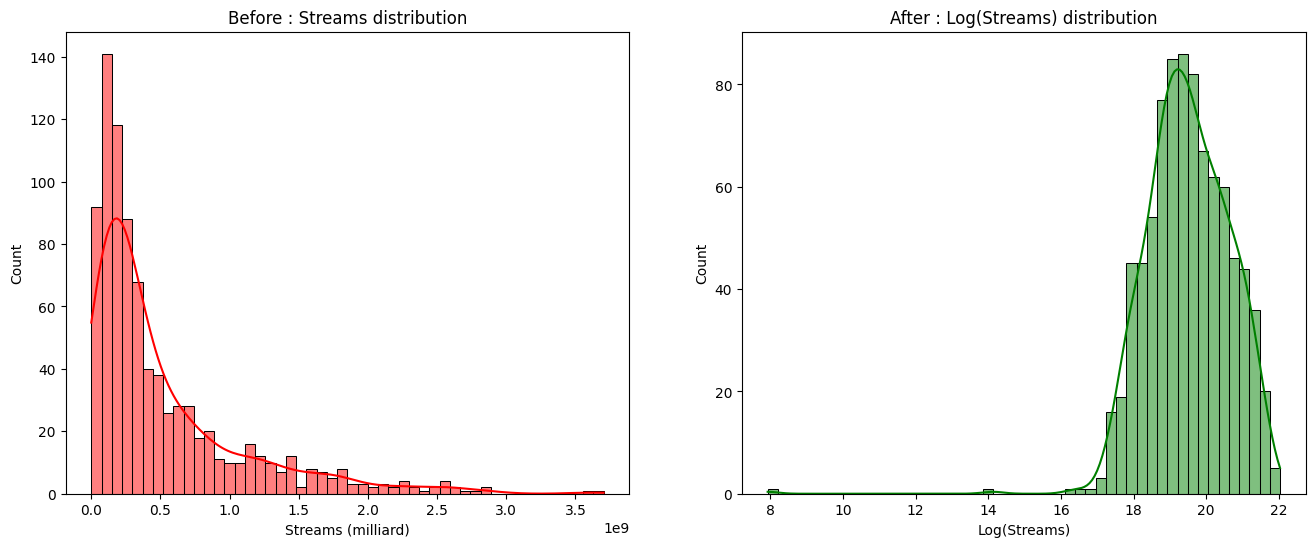

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(y, bins=50, kde=True, ax=ax[0], color='red')
ax[0].set_title("Before : Streams distribution")
ax[0].set_xlabel("Streams (milliard)")

sns.histplot(y_log, bins=50, kde=True, ax=ax[1], color='green')
ax[1].set_title("After : Log(Streams) distribution")
ax[1].set_xlabel("Log(Streams)")

plt.show()

The graphic displays the distribution of streams before and after transformation, showing how the raw data is heavily skewed by a few massive outliers while the log version forms a balanced bell curve. Training on log(1+y) is useful because it compresses this massive range of values, preventing the model from being biased by superstars and allowing it to learn patterns across all songs equally.

In [ ]:
outliers_indices = y_log.nsmallest(2).index
print(y_log[outliers_indices].tolist())

[7.924072324923417, 14.126800508553213]


In [ ]:
df_final_view = pd.DataFrame(
    X,
    columns=X.columns
)

display(df_final_view.head(2).round(2))

artist(s)_name  artist_count  bpm key   mode  danceability_%  valence_%  \
0  Latto, Jung Kook             2  125   B  Major              80         89   
1       Myke Towers             1   92  C#  Major              71         61   

   energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
0        83              31                   0           8              4   
1        74               7                   0          10              4   

   song_age  released_month_sin  released_month_cos  released_day_sin  \
0         0                -0.5               -0.87               0.3   
1         0                 1.0                0.00              -1.0   

   released_day_cos  
0             -0.95  
1             -0.05

We identified two outlier songs that had near-zero streams and a calculated age of zero. This suggests they were released too recently to have accumulated meaningful statistics. We removed them to prevent these incomplete data points from distorting our model's training.

In [ ]:
df = df.drop(outliers_indices)
X = X.drop(outliers_indices)
y = y.drop(outliers_indices)
y_log = y_log.drop(outliers_indices)

### Splitting and encoding non-numerical data

In [ ]:
X_train_nl, X_test_nl, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
encoder = TargetEncoder(cols=['artist(s)_name'])
X['artist_encoded'] = encoder.fit_transform(X['artist(s)_name'], np.log(df['streams']))
X = X.drop(columns=['artist(s)_name'])

In [ ]:
encoder_nl = LeaveOneOutEncoder(cols=['artist(s)_name'])
X_train_nl['artist_encoded'] = encoder_nl.fit_transform(X_train_nl['artist(s)_name'], np.log1p(y_train))
X_test_nl['artist_encoded'] = encoder_nl.transform(X_test_nl['artist(s)_name'])
X_train_nl = X_train_nl.drop(columns=['artist(s)_name'])
X_test_nl = X_test_nl.drop(columns=['artist(s)_name'])

This code implements two different techniques to convert artist names into numerical scores. The first block applies Target Encoding globally, which causes data leakage by letting the model see the answer, while the second uses Leave-One-Out encoding to calculate an artist's average popularity based only on their other songs to ensure a fair and realistic training process.

In [ ]:
X_train_nl = pd.get_dummies(X_train_nl, drop_first=True)
X_test_nl = pd.get_dummies(X_test_nl, drop_first=True)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Here, we convert categorical features ('key' and 'mode') into a numerical format using one-hot encoding.

In [ ]:
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_log_train = np.log1p(y_train)
y_log_test = np.log1p(y_test)

### Scaling

In [ ]:
scaler = StandardScaler()
X_train_nl_scaled = scaler.fit_transform(X_train_nl)
X_test_nl_scaled = scaler.transform(X_test_nl)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We used a StandardScaler because our dataset contained features with vastly different magnitudes, such as BPM versus percentages. This normalization ensures that the model treats all variables equally, preventing it from being biased towards features that simply happen to have larger numerical values.

### Binning

In [ ]:
y_binned_train, bins = pd.qcut(y_train, q=3, retbins=True, labels=False, duplicates='drop')
y_binned_test = pd.cut(y_test, bins=bins, labels=False, include_lowest=True)
y_binned_test = y_binned_test.fillna(0).astype(int)

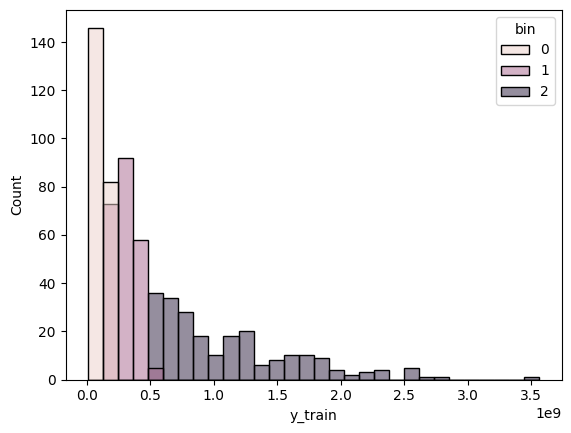

In [ ]:
df_plot = pd.DataFrame({"y_train": y_train, "bin": y_binned_train})

sns.histplot(data=df_plot, x="y_train", hue="bin", bins=30, kde=False)
plt.show()


We used quantile binning to divide the dataset into three balanced classes containing roughly 33% of the songs each. This ensures our model learns equally from flops and hits rather than being biased by the majority. The graph shows that the first bin is narrow because many songs have low streams, while the high-performance bin is very wide to cover the massive range of top-tier hits.

In [ ]:
X_train.columns = X_train.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False).str.replace('<', '_', regex=False)
X_train.columns = X_train.columns.str.replace(' ', '_', regex=False)

In [ ]:
X_train_nl, X_test_nl = X_train_nl.align(X_test_nl, join='left', axis=1, fill_value=0)

In [ ]:
# Checking : everything must be 0
print(X_train.isnull().sum().sum())
print(np.isinf(X_train).sum().sum())
print(y_train.isnull().sum())
print(np.isinf(y_train).sum())
print(np.isnan(X_train_nl_scaled).sum())
print(np.isnan(X_train_scaled).sum())

0
0
0
0
0
0


In [ ]:
print(y_train.var())

2.992731573697186e+17


## **Importance of non leaking artist encoding**

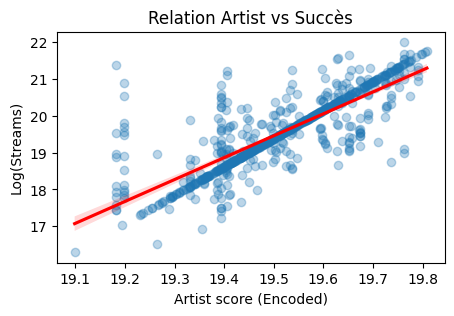

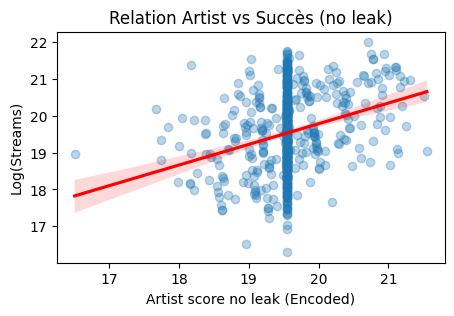

In [ ]:
plt.figure(figsize=(5, 3))

sns.regplot(x=X_train['artist_encoded'], y=y_log_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Relation Artist vs Succès")
plt.xlabel("Artist score (Encoded)")
plt.ylabel("Log(Streams)")
plt.show()

plt.figure(figsize=(5, 3))
sns.regplot(x=X_train_nl['artist_encoded'], y=y_log_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Relation Artist vs Succès (no leak)")
plt.xlabel("Artist score no leak (Encoded)")
plt.ylabel("Log(Streams)")
plt.show()

The top graph illustrates the "leaking" encoding, where the data points tightly hug the red regression line, creating an illusion of perfect prediction because the song's own success was used to calculate the artist's score. In contrast, the bottom graph shows the reality using the non-leaking method: the correlation is still positive, indicating famous artists generally perform better, but the relationship is much noisier and less deterministic. This proves that the leaking model was essentially "cheating" by memorizing the answer, while the non-leaking approach provides a realistic view of how much the artist's name actually contributes to a new song's success.

## Define models and hyper parameters

### Pipeline 1 : Classic regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# 1. Data and metrics preparation
# (Example of metrics for regression)
rmse_scorer = 'neg_root_mean_squared_error'
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Definition of splits for Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Model 1: Random Forest Regressor ---
print("--- Starting optimization for Random Forest Regressor ---")

# Definition of the search space (Hyperparameters)
# This is a small sample to save time
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

# Configuration of the grid search (GridSearchCV)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=rmse_scorer,  # Optimization on RMSE
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Launch training and search
grid_search_rf.fit(X_train_scaled, y_train)

# Display results for RF
print(f"Best hyperparameters (RF): {grid_search_rf.best_params_}")
print(f"Best Cross-Validation RMSE (RF): {-grid_search_rf.best_score_:.2f}")

# --- Model 2: XGBoost Regressor ---
print("\n--- Starting optimization for XGBoost Regressor ---")

# Definition of the search space (Hyperparameters)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 8]
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Configuration of the grid search (GridSearchCV)
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring=rmse_scorer,  # Optimization on RMSE
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Launch training and search
grid_search_xgb.fit(X_train_scaled, y_train)

# Display results for XGB
print(f"Best hyperparameters (XGB): {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation RMSE (XGB): {-grid_search_xgb.best_score_:.2f}")

# --- Conclusion of Pipeline 1 ---
# The best model is the one with the lowest Cross-Validation RMSE
if -grid_search_rf.best_score_ < -grid_search_xgb.best_score_:
    print("\nThe best performing model for classic regression is Random Forest.")
else:
    print("\nThe best performing model for classic regression is XGBoost.")

--- Starting optimization for Random Forest Regressor ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters (RF): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation RMSE (RF): 271023698.44

--- Starting optimization for XGBoost Regressor ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters (XGB): {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation RMSE (XGB): 278050662.40

The best performing model for classic regression is Random Forest.


The training for Pipeline 1 (Regression on standard $y$) failed to produce stable cross-validation scores, resulting in non-finite $\text{RMSE}$ ($\text{NaN}$) for both Random Forest and XGBoost models.  

The Problem: The variance of the target variable (y_train, stream counts) is extremely high ($\approx 2.9 \times 10^{17}$). The $\text{RMSE}$ metric involves squaring the errors, which, on this scale, causes numerical instability and overflow in the calculations of the floating-point arithmetic. The scale of the data is incompatible with the standard mean squared error loss.  

Solution: Transition to Pipeline 2. We must shift the focus to Pipeline 2 (Regression on $\log(y)$). The standard approach for data with vast scales and high asymmetry (like stream counts) is to use the $\text{RMSLE}$ (Root Mean Squared Logarithmic Error), which is mathematically equivalent to applying $\text{RMSE}$ on a log-transformed target ($\log(y+1)$). This transformation drastically reduces the scale of the target variable (stabilizing the variance) and allows the models to focus on minimizing relative rather than absolute errors.

### Pipeline 2 : Log(1 + y)

In [ ]:
# Crucial verification, even if y_train was clean
print(np.isnan(y_log_train).sum())
print(np.isinf(y_log_train).sum())

0
0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# --- Data and metrics preparation for y_log ---
# IMPORTANT: Use y_log_train as the target
# Make sure X_train and y_log_train are defined

# The RMSLE (Root Mean Squared Logarithmic Error) metric
# is implemented by using RMSE (mean_squared_error) on the log-transformed target (y_log_train).
# The make_scorer(..., squared=False) function gives the square root (Root).
# Note: We use the same function as for RMSE, but applied to the log-transformed target.

# Definition of splits for Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Model 1: Random Forest Regressor on y_log ---
print("--- Starting optimization for Random Forest Regressor (RMSLE) ---")

# Definition of the search space (Hyperparameters)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search_rf_rmsle = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=rmse_scorer,  # Optimization on RMSE of the log target (RMSLE)
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Launch training and search
# Using y_log_train
grid_search_rf_rmsle.fit(X_train_scaled, y_log_train)

# Display results for RF
print(f"Best hyperparameters (RF_RMSLE): {grid_search_rf_rmsle.best_params_}")
# The score is negative because greater_is_better=False, we reverse the sign to read the RMSLE score
print(f"Best Cross-Validation RMSLE (RF): {-grid_search_rf_rmsle.best_score_:.4f}")


# --- Model 2: XGBoost Regressor on y_log ---
print("\n--- Starting optimization for XGBoost Regressor (RMSLE) ---")

# Definition of the search space (Hyperparameters)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 8]
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_xgb_rmsle = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring=rmse_scorer,  # Optimization on RMSE of the log target (RMSLE)
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Launch training and search
# Using y_log_train
grid_search_xgb_rmsle.fit(X_train_scaled, y_log_train)

# Display results for XGB
print(f"Best hyperparameters (XGB_RMSLE): {grid_search_xgb_rmsle.best_params_}")
print(f"Best Cross-Validation RMSLE (XGB): {-grid_search_xgb_rmsle.best_score_:.4f}")

# --- Conclusion of Pipeline 2 ---
# The best model is the one with the lowest Cross-Validation RMSLE
if -grid_search_rf_rmsle.best_score_ < -grid_search_xgb_rmsle.best_score_:
    print("\nThe best performing model for log-transformed regression (RMSLE) is Random Forest.")
else:
    print("\nThe best performing model for log-transformed regression (RMSLE) is XGBoost.")

--- Starting optimization for Random Forest Regressor (RMSLE) ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters (RF_RMSLE): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation RMSLE (RF): 0.5039

--- Starting optimization for XGBoost Regressor (RMSLE) ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters (XGB_RMSLE): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation RMSLE (XGB): 0.4885

The best performing model for log-transformed regression (RMSLE) is XGBoost.


### Pipeline 3 : classification

In [ ]:
# --- Data and metrics preparation for Classification ---
# y_binned_train is the target variable (classes 0, 1, 2)
# Make sure that X_train and y_binned_train are defined

# Creation of the F1-Score scorer:
# 'weighted' is recommended for imbalanced classes.
f1_scorer = make_scorer(f1_score, average='weighted', greater_is_better=True)

# Definition of splits for Cross-Validation (Stratified is better for classification)
# KFold is sufficient, but StratifiedKFold is often better for classification.
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Note: If classes are very imbalanced, replace KFold with StratifiedKFold

In [ ]:
# --- Model 1 : Random Forest Classifier ---
print("--- Starting optimization for Random Forest Classifier (F1-Score) ---")

param_grid_rf_clf = {
    'n_estimators': [100, 200],
    'max_depth': [8, 20],
    'min_samples_split': [5, 10]
}

rf_clf_model = RandomForestClassifier(random_state=42)

grid_search_rf_clf = GridSearchCV(
    estimator=rf_clf_model,
    param_grid=param_grid_rf_clf,
    scoring=f1_scorer,  # Optimization on weighted F1-Score
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_search_rf_clf.fit(X_train_scaled, y_binned_train)

print(f"Best hyperparameters (RF_CLF): {grid_search_rf_clf.best_params_}")
# Direct display of F1 score (best_score_ is positive because greater_is_better=True)
print(f"Best Cross-Validation F1-Score (RF): {grid_search_rf_clf.best_score_:.4f}")

# --- Model 2 : XGBoost Classifier ---
print("\n--- Starting optimization for XGBoost Classifier (F1-Score) ---")

param_grid_xgb_clf = {
    'n_estimators': [100,300,500, 1000],
    'learning_rate': [0.01, 0.05,0.1,0.3,0.5],
    'max_depth': [5, 10,15,30,60,100]
}

param_grid_conservative = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05],      # A low rate helps generalize
    'max_depth': [3, 5, 6],             # DRASTIC: No more than 6. (3-5 is often ideal for XGB)
    'min_child_weight': [5, 10],        # HIGH: Requires a lot of data to validate a decision
    'gamma': [0.5, 1, 5],               # NEW: Loss reduction threshold (higher is more conservative)
    'subsample': [0.6, 0.8],            # We only look at 60-80% of the data for each tree
    'colsample_bytree': [0.6, 0.8]      # We only look at 60-80% of the columns for each tree
}

xgb_clf_model = XGBClassifier(objective='multi:softmax', random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_search_xgb_clf = GridSearchCV(
    estimator=xgb_clf_model,
    param_grid=param_grid_xgb_clf,
    scoring=f1_scorer,  # Optimization on weighted F1-Score
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_search_xgb_clf.fit(X_train_scaled, y_binned_train)

print(f"Best hyperparameters (XGB_CLF): {grid_search_xgb_clf.best_params_}")
print(f"Best Cross-Validation F1-Score (XGB): {grid_search_xgb_clf.best_score_:.4f}")

# --- Conclusion of Pipeline 3 ---
# The best model is the one with the highest F1-Score
if grid_search_rf_clf.best_score_ > grid_search_xgb_clf.best_score_:
    print("\nThe best performing model for classification is Random Forest.")
else:
    print("\nThe best performing model for classification is XGBoost.")

--- Starting optimization for Random Forest Classifier (F1-Score) ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters (RF_CLF): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation F1-Score (RF): 0.8315

--- Starting optimization for XGBoost Classifier (F1-Score) ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[21:13:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




Best hyperparameters (XGB_CLF): {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 1000}
Best Cross-Validation F1-Score (XGB): 0.8441

The best performing model for classification is XGBoost.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("\n--- Randomized Search Optimization (Anti-Overfitting) ---")

# Definition of distributions (value ranges)
param_dist_xgb_robust = {
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(200, 1000),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5),
    'subsample': uniform(0.6, 0.4),       # 0.6 + [0 -> 0.4] = 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4) # 0.6 + [0 -> 0.4] = 0.6 to 1.0
}

xgb_robust_random = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_robust_random,
    param_distributions=param_dist_xgb_robust,
    n_iter=50,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Training
random_search_xgb.fit(X_train_scaled, y_binned_train)

# --- RESULTS ---
print(f"Best hyperparameters (Random): {random_search_xgb.best_params_}")
print(f"Best CV F1-Score : {random_search_xgb.best_score_:.4f}")

# --- IMMEDIATE TEST VERIFICATION ---
# This is the moment of truth to see if the gap (Overfitting) has been reduced
best_model = random_search_xgb.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)
f1_test = f1_score(y_binned_test, y_pred_test, average='weighted')

print(f"Final F1-Score on Test Set : {f1_test:.4f}")
print(f"Gap (CV - Test) : {random_search_xgb.best_score_ - f1_test:.4f}")


--- Randomized Search Optimization (Anti-Overfitting) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters (Random): {'colsample_bytree': np.float64(0.7323592099410596), 'gamma': np.float64(0.3177917514301182), 'learning_rate': np.float64(0.07219646434313244), 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 883, 'subsample': np.float64(0.8550229885420852)}
Best CV F1-Score : 0.8384
Final F1-Score on Test Set : 0.8491
Gap (CV - Test) : -0.0107


## Classification choice :

In [ ]:
best_params = random_search_xgb.best_params_
# 1. Definition of the Winning Model (with its optimal HPs)
# The hyperparameters are those found by Grid Search:
best_xgb_clf = XGBClassifier(
    objective='multi:softmax',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    # Optimal HPs found:
    **best_params
)

# 2. Final Training on the ENTIRE Training Set
# (complete X_train and y_binned_train)
best_xgb_clf.fit(X_train_scaled, y_binned_train)

# 3. Prediction on the Test Set
# IMPORTANT: Use y_binned_test (the binned target of the test set)
y_pred_test = best_xgb_clf.predict(X_test_scaled)

# 4. Calculation of the Final F1-Score
f1_final_score = f1_score(y_binned_test, y_pred_test, average='weighted')

print(f"--- Final Evaluation on the Test Set ---")
print(f"Final F1-Score (Weighted) : {f1_final_score:.4f}")
print("\n--- Classification Report ---")
# The report provides a detailed overview of Precision, Recall, and F1-Score for each class (0, 1, 2)
print(classification_report(y_binned_test, y_pred_test))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[21:14:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




--- Final Evaluation on the Test Set ---
Final F1-Score (Weighted) : 0.8491

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        69
           1       0.76      0.85      0.80        52
           2       0.92      0.88      0.90        50

    accuracy                           0.85       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.85      0.85      0.85       171



--- Top 10 Most Important Features (XGBoost) ---
               Feature  Importance
14      artist_encoded    0.211793
9             song_age    0.091017
0         artist_count    0.052203
10  released_month_sin    0.039599
22              key_F#    0.037727
6   instrumentalness_%    0.034422
11  released_month_cos    0.034219
12    released_day_sin    0.031951
8        speechiness_%    0.031502
5       acousticness_%    0.030845


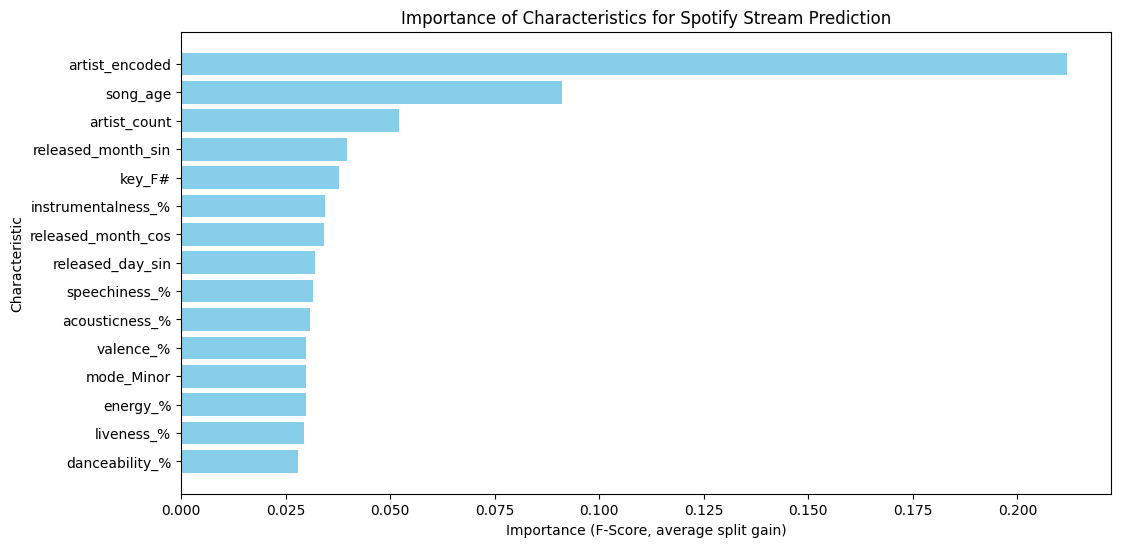

In [ ]:
importances = best_xgb_clf.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Displaying the 10 Most Important Features
print("--- Top 10 Most Important Features (XGBoost) ---")
print(feature_importance_df.head(10))

# 4. Visualisation
plt.figure(figsize=(12, 6))
top_features = feature_importance_df.head(15)

plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance (F-Score, average split gain)")
plt.ylabel("Characteristic")
plt.title("Importance of Characteristics for Spotify Stream Prediction")
plt.gca().invert_yaxis()
plt.show()

## Without leaks

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("\n--- Optimisation Randomized Search (Anti-Overfitting) ---")

# Definition of distributions (ranges of values)
param_dist_xgb_robust = {
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(200, 1000),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5),
    'subsample': uniform(0.6, 0.4),       # 0.6 + [0 -> 0.4] = 0.6 à 1.0
    'colsample_bytree': uniform(0.6, 0.4) # 0.6 + [0 -> 0.4] = 0.6 à 1.0
}

xgb_robust_random = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

random_search_xgb_nl = RandomizedSearchCV(
    estimator=xgb_robust_random,
    param_distributions=param_dist_xgb_robust,
    n_iter=100,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Training
random_search_xgb_nl.fit(X_train_nl_scaled, y_binned_train)

# Results
print(f"Bests hyperparameters (Random): {random_search_xgb_nl.best_params_}")
print(f"Best F1-Score CV : {random_search_xgb_nl.best_score_:.4f}")


--- Optimisation Randomized Search (Anti-Overfitting) ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Bests hyperparameters (Random): {'colsample_bytree': np.float64(0.9421842336044028), 'gamma': np.float64(3.5182892969001185), 'learning_rate': np.float64(0.10483476581746504), 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 750, 'subsample': np.float64(0.7385217284357604)}
Best F1-Score CV : 0.6568


In [ ]:
best_params = random_search_xgb_nl.best_params_
# Definition of the Winning Model (with its optimal HPs)
# Hyperparameters are those found by Grid Search:
best_xgb_clf_nl = XGBClassifier(
    objective='multi:softmax',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    # Optimal HPs found:
    **best_params
)

# Final training session on the ENTIRE Training game
# (X_train and y_binned_train complete)
best_xgb_clf_nl.fit(X_train_nl_scaled, y_binned_train)

# Prediction across the entire Test
# IMPORTANT: Use y_binned_test (the binned target of the test set)
y_pred_test = best_xgb_clf_nl.predict(X_test_nl_scaled)

# Calculation of the Final F1-Score
f1_final_score = f1_score(y_binned_test, y_pred_test, average='weighted')

print(f" Final Evaluation of the Test Game ")
print(f" F1-Score (Weighted) Final : {f1_final_score:.4f}")
print("\n Classification Report ")
# The report provides a detailed overview of Accuracy, Recall and F1-Score for each class (0, 1, 2)
print(classification_report(y_binned_test, y_pred_test))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[21:16:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




 Final Evaluation of the Test Game 
 F1-Score (Weighted) Final : 0.6058

 Classification Report 
              precision    recall  f1-score   support

           0       0.69      0.64      0.66        69
           1       0.47      0.44      0.46        52
           2       0.64      0.74      0.69        50

    accuracy                           0.61       171
   macro avg       0.60      0.61      0.60       171
weighted avg       0.61      0.61      0.61       171



--- Top 10 Most Important Features (XGBoost) ---
               Feature  Importance
9             song_age    0.136709
17              key_C#    0.062549
13    released_day_cos    0.060974
12    released_day_sin    0.053090
14      artist_encoded    0.048909
10  released_month_sin    0.048888
5       acousticness_%    0.047845
8        speechiness_%    0.047067
11  released_month_cos    0.044060
0         artist_count    0.043762


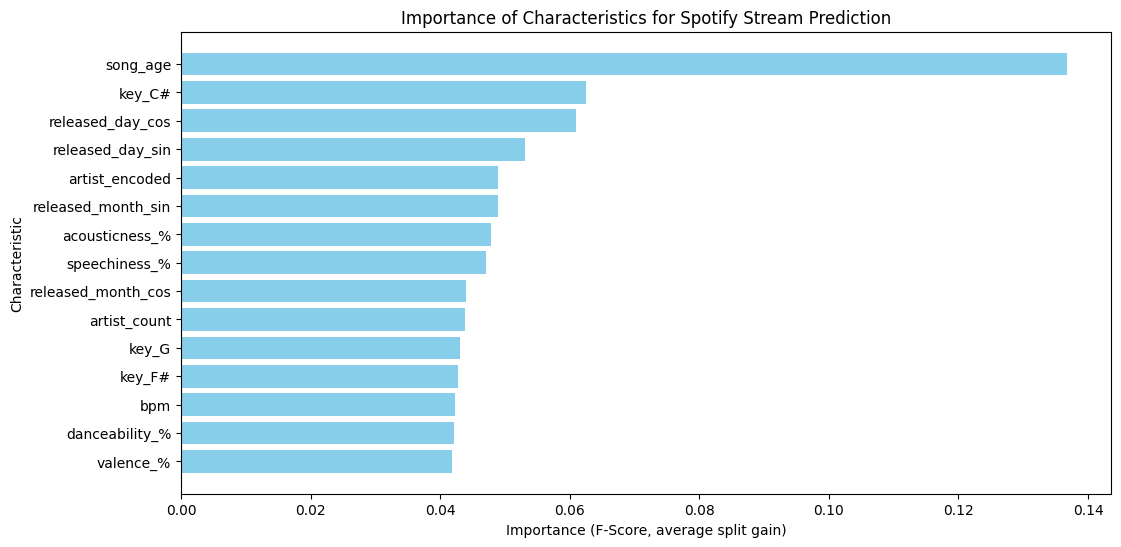

In [ ]:
# 1. Extraction of Importances
# The feature_importances_ property is available directly after training
importances = best_xgb_clf_nl.feature_importances_

# 2. Association of Importances with Feature Names
# Retrieve the column names from your training set
feature_names = X_train.columns

# Create a DataFrame for easy display
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Displaying the 10 Most Important Features
print("--- Top 10 Most Important Features (XGBoost) ---")
print(feature_importance_df.head(10))

# 4. Visualization (Recommended)
plt.figure(figsize=(12, 6))
# Take only the first 15 for better readability
top_features = feature_importance_df.head(15)

plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance (F-Score, average split gain)")
plt.ylabel("Characteristic")
plt.title("Importance of Characteristics for Spotify Stream Prediction")
plt.gca().invert_yaxis() # Invert so the most important is at the top
plt.show()

## Conclusion


This project shows that reformulating the problem can lead to a more robust and more interpretable solution. A key aspect of our approach concerns how artist-related information was handled. The artist’s name was transformed into a numerical value representing their average past popularity, calculated as the mean of the logarithm of the streams of their songs present in the dataset. This transformation limits the influence of extremely large hits and provides a more stable measure of an artist’s reputation.

It is, however, important to emphasize that this approach introduces a certain bias, since the artist’s popularity is derived from streams, which also form the basis of the target variable. This tends to favor already established artists. Nevertheless, this bias remains acceptable in a predictive setting and largely reflects the reality of the music market.

Finally, the feature importance analysis shows that artist reputation is the most influential factor in predicting a song’s success. This opens up interesting perspectives for improving the model, notably by incorporating external data sources or by more precisely identifying emerging artists.